![Alt Text](https://3.bp.blogspot.com/-tD49ceKDfV0/WVGIGzO0QmI/AAAAAAAAk7E/AArfVEW_bWUNUBYUGAizjEKRA51tcPPYwCLcBGAs/s1600/AGRICULTURAL%2BREVOLUTION.jpg)

<h1 style = "font-family: Comic Sans MS;background-color:#FFC305"> Ancient Agriculture, and our history </h1>

Isn't agriculture and farming one of the most important activities needed for a man's survival? 

The history of agriculture is the story of humankind's development and cultivation of processes for producing food, feed, fiber, fuel, and other goods by the systematic raising of plants and animals. Prior to the development of plant cultivation, human beings were hunters and gatherers.🪓 The knowledge and skill of learning to care for the soil and growth of plants advanced the development of human society, allowing clans and tribes to stay in one location generation after generation. 

Archaeological evidence indicates that such developments occurred 10,000 or more years ago. 🌾🌽


<h1 style = "font-family: Comic Sans MS;background-color:#FFC305"> A brief introduction about the dataset </h1>

Before actually starting to learn about the dataset, we should first try to understand the organization and its purpose for 

**About Seshat**

Seshat: 
Global History Databank is an international scientific research project of the nonprofit Evolution Institute. Founded in 2011, the Seshat: Global History Databank gathers data into a single, large database that can be used to test scientific hypotheses. The Databank consults directly with expert scholars to code what historical societies and their environments were like in the form of accessible datapoints and thus forms a digital storehouse for data on the political and social organization of all human groups from the early modern back to the ancient and neolithic periods.

Global History Databank is governed by the Board of Directors, who are advised by a number of subject matter consultants. Data collection for a specific NGA is coordinated by a Regional Editor, and data entered for a specific polity has been gathered in consultation with expert historians and archaeologists but is continually updated via ongoing expert review. The hands-on work of populating the databank is accomplished by the project’s Research Assistants and Postdoctoral Research Associates. 


**About the Project: Agricultural Productivity and Carrying Capacity**

Agricultural productivity and its variation across time and space plays a fundamental role in many theories of human social and cultural evolution. Because agricultural societies enjoy a demographic advantage over hunter-gatherer societies, the transition from foraging to agriculture fueled a series of population expansions world-wide, which spread the farmers’ culture, language, and genes with them. However, although the Neolithic Revolution was one of the most consequential transitions in human evolution, we lack systematically collected quantitative estimates of the productivity of past agricultural systems on a large enough scale.

![Alt Text](https://i.pinimg.com/474x/e8/a0/60/e8a06059b8cf49d04a8ec3df85cc3534.jpg)

In particular, by how much did adoption of agriculture increase human carrying capacity, the maximum population density a particular environment can sustain indefinitely, without depleting critical resources needed for survival and reproduction? Even more importantly, how did agricultural productivity /carrying capacity vary over time (as new technologies were invented and spread, and as a result of climate change) and in space (between geographic regions characterized by different soils, landscapes, and climate)? Seshat: Global History Databank is exploring various techniques to combine estimations of historical ecology, corp types and yields, and farming practices along with simulations of changing weather patterns to produce reliable, empirically-grounded estimates of productivity and carrying capacity in different parts of the world through time.

It's becoming too boring, isn't it? Let us dive right into our dataset now and try to understand it! 🌾🌽

In [1]:
#Project: AgriSeshat: Agriculture Dataset
#Date : May 8, 2021

In [2]:
# Import all of the necessary packages.
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import re
from matplotlib.pyplot import stackplot

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("Agriculture.csv")

In [4]:
df.head()

,NGA,Variable,Value From,Value To,Value Note,Date From,Date To,Unit,Explanation
0,Big Island Hawaii,Carbohydrate Source 1,sweet potato,NaN,NaN,750,1800,NaN,Sweet potato was the the dominant crop in the ...
1,Big Island Hawaii,Cropping System,swidden,NaN,NaN,750,1400,NaN,Shifting cultivation (in the form of swidden a...
2,Big Island Hawaii,Cropping System Coefficient,0.23,NaN,inferred,750,1400,NaN,Generic estimate
3,Big Island Hawaii,Fertilizer Coefficient,1.3,NaN,NaN,750,1900,NaN,Assuming 30% while looking for an estimate
4,Big Island Hawaii,Fertilizers,present,NaN,inferred,750,1800,NaN,Inferred ash from slash-and-burn cultivation. ...


**A Few Observations:**  🌾🌽

* The dates seems to be a bit difficult to comprehend at the first go.
* NGA refers to Natural Geographic Region, these regions are divided as per the conventions used in older times. 

    * This  type  of  unit  is  primarily  a  unit  of  data  collection  or  analysis  and  is  defined  spatially  by  the  area  enclosed  within  a  boundary drawn on the world map. 
    * It does not change with time. Its rough spatial scale  is  100  km  ×  100  km  (but  can  vary  several-fold).  
    * Examples:  Latium,  Upper Egypt, Middle Yellow River Valley. It is the basic geographical sampling unit.
    
    
* The Variable feature consists of the type of attribute used in a particular NGA. Further information of this feature has been given in the explanation column.

* Since this dataset refers to draw information about ancient humans and their habits, the dates to and from ranges from long back BC to 2000s.

* Unit column hardly seems to have any important information, we might as well drop it later!

In [5]:
df.columns

Index(['NGA', 'Variable', 'Value From', 'Value To', 'Value Note', 'Date From',
       'Date To', 'Unit', 'Explanation'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   NGA          330 non-null    object
 1   Variable     330 non-null    object
 2   Value From   330 non-null    object
 3   Value To     53 non-null     object
 4   Value Note   36 non-null     object
 5   Date From    330 non-null    int64 
 6   Date To      330 non-null    int64 
 7   Unit         61 non-null     object
 8   Explanation  330 non-null    object
dtypes: int64(2), object(7)
memory usage: 23.3+ KB


**Observation:** 

* So,there are 330 rows and 9 columns in our dataset. 
* We can also take a glance at the Data types of all the columns. 
* We can  see that there are a lot of null values in few of the columns. 
* Let's explore it in a bit more detail.

Text(0.5, 1.0, 'type of our data ')

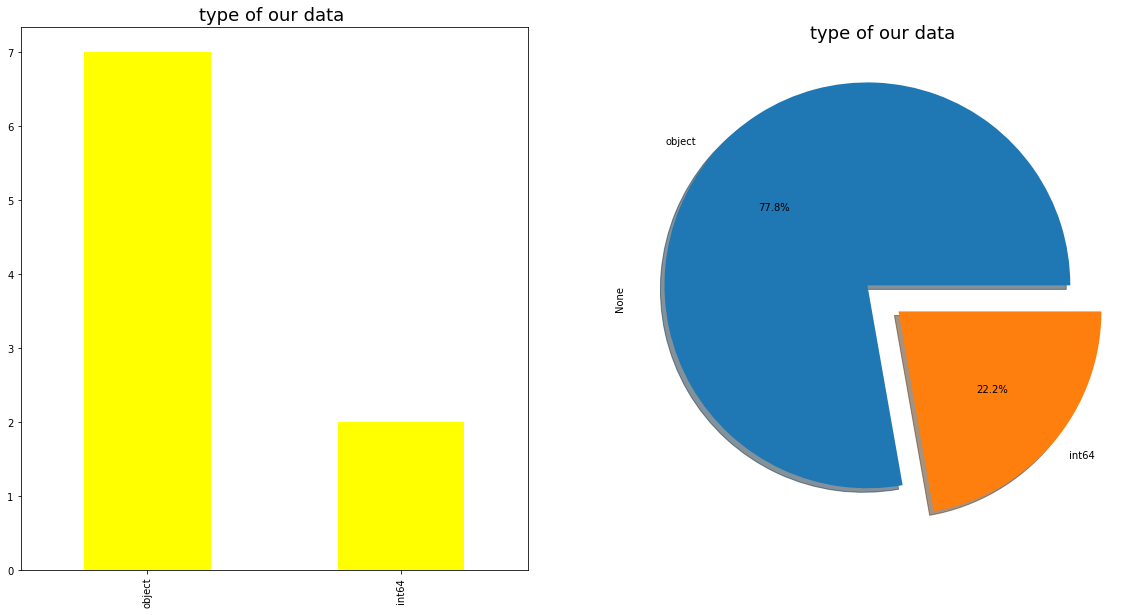

In [7]:
fig, axarr = plt.subplots(1, 2, figsize=(20, 10))

df.dtypes.value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,ax=axarr[1])
axarr[1].set_title("type of our data ", fontsize=18)

df.dtypes.value_counts().plot(kind='bar',ax=axarr[0], color = 'yellow')
plt.title('type of our data', fontsize = 18);
axarr[0].set_title("type of our data ", fontsize=18)

In [8]:
df.shape

(330, 9)

In [9]:
df.isnull().sum()

NGA              0
Variable         0
Value From       0
Value To       277
Value Note     294
Date From        0
Date To          0
Unit           269
Explanation      0
dtype: int64

**Note:** Columns "Value To", "Value Note" and "Unit" contains around 80-90% missing values! We can defintely not drop the null values as our dataset itself is too small. How about eliminating these columns altogether? 
But we are here to understand the data collected by Seshat for the project AgriSeshat. So dropping the columns is not an option for us. 
Lets see how well we're able to understand this data!

<AxesSubplot:>

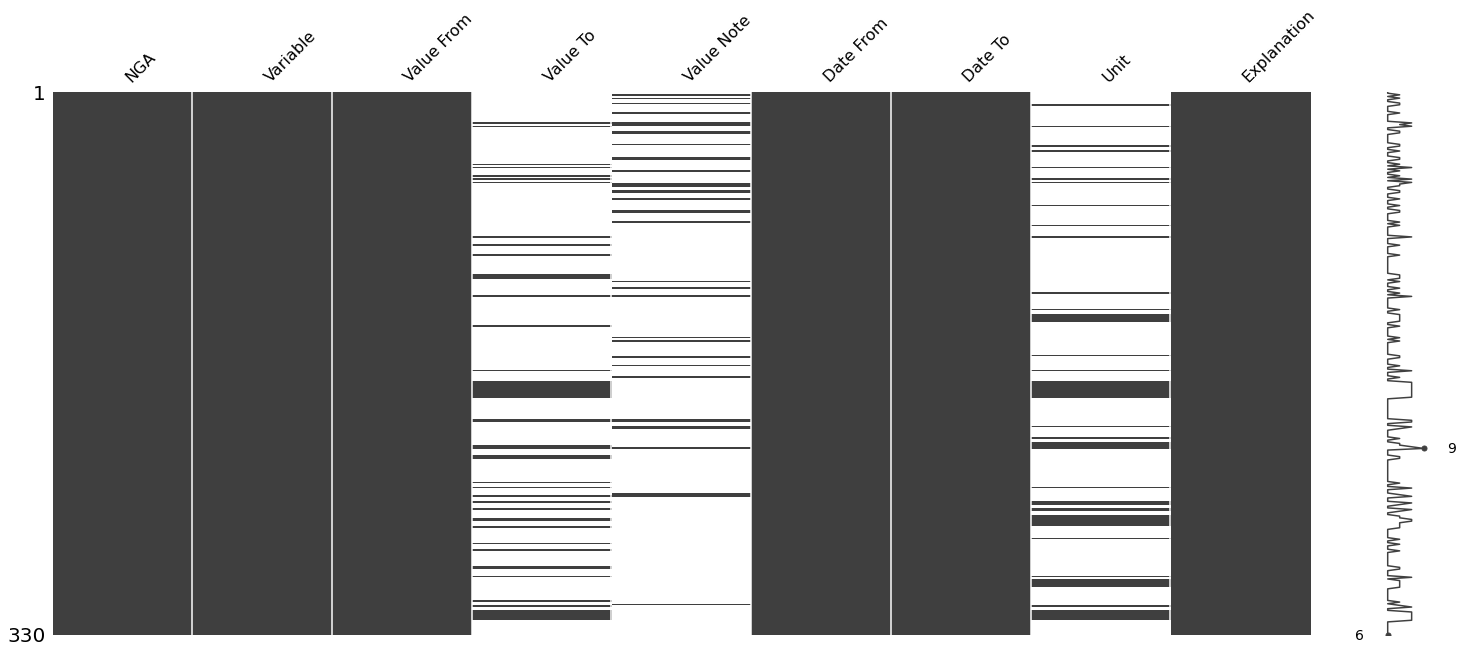

In [10]:
msno.matrix(df)

<AxesSubplot:>

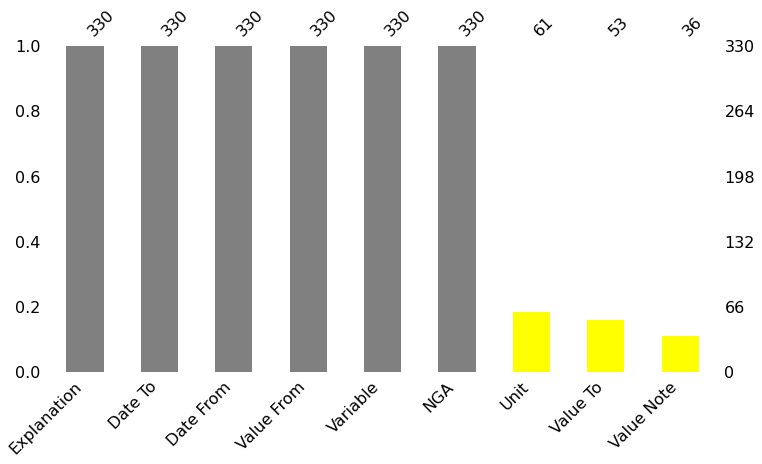

In [11]:
color = ['grey','grey','grey','grey','grey','grey','yellow', 'yellow', 'yellow']
msno.bar(df,fontsize =16, color = color, sort = 'descending', figsize = (12,6))

<AxesSubplot:>

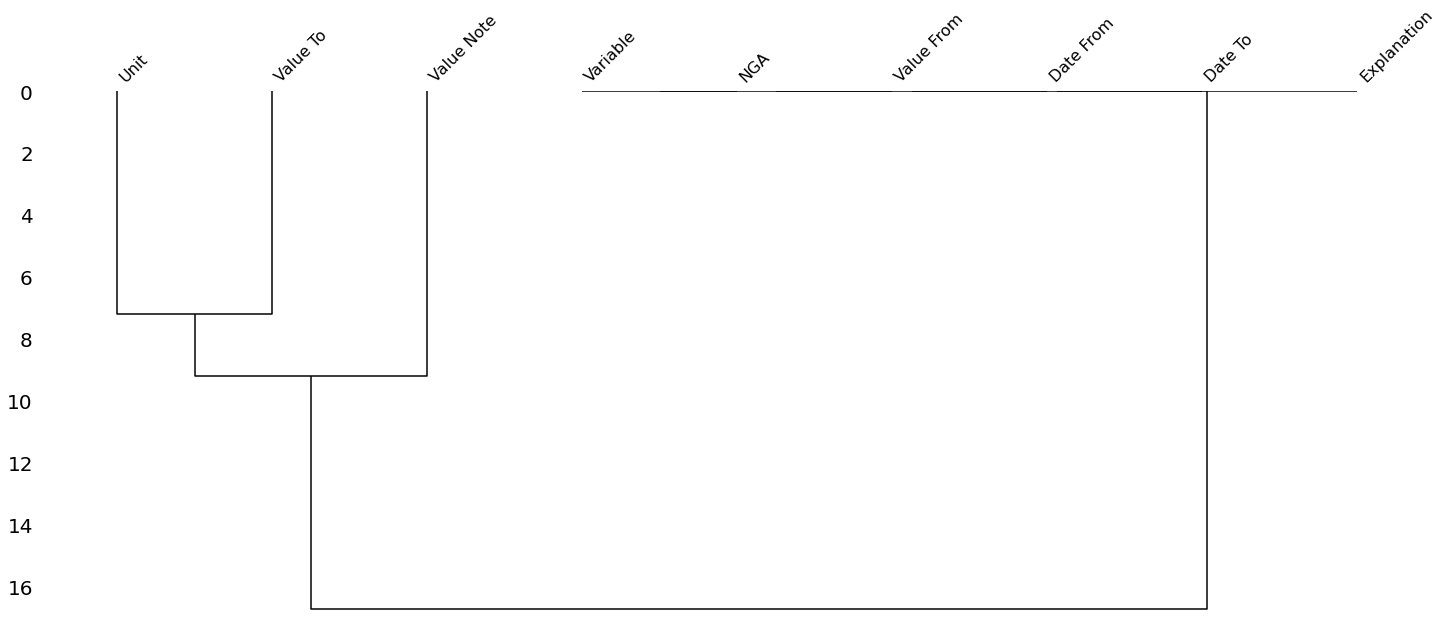

In [12]:
msno.dendrogram(df)

In [13]:
for i in df.columns:
    null_rate = df[i].isnull().sum() / len(df) * 100 
    if null_rate > 0 :
        print("{}'s null rate :{}%".format(i,round(null_rate,2)))

Value To's null rate :83.94%
Value Note's null rate :89.09%
Unit's null rate :81.52%


**Observation:** Well, we can see that these 3 columns have more than 80% null values. It would be quite difficult to derive insights from these columns.

In [14]:
df.NGA.value_counts()

Latium                        24
Paris Basin                   23
Valley of Oaxaca              20
Middle Yellow River Valley    19
Kansai                        17
Konya Plain                   16
Kachi Plain                   15
Cambodian Basin               15
Cuzco                         14
Susiana                       12
Big Island Hawaii             12
Deccan                        12
Upper Egypt                   11
Central Java                  10
Cahokia                       10
Niger Inland Delta            10
Yemeni Coastal Plain           9
Chuuk Islands                  9
Finger Lakes                   9
Sogdiana                       8
North Colombia                 7
Lena River Valley              7
Oro PNG                        6
Ghanaian Coast                 6
Southern China Hills           6
Garo Hills                     6
Kapuasi Basin                  6
Lowland Andes                  5
Iceland                        5
Orkhon Valley                  1
Name: NGA,

**Observations:** There are highest number of entries for the Natural Geographic Region of Latium, followed by Paris Basin to the least which is Orkhon Valley. 


In [15]:
df['Variable'].value_counts()

Historical Productivity        62
Cropping System                55
Cropping System Coefficient    54
Fertilizers                    40
Irrigation                     40
Carbohydrate Source 1          36
Fertilizer Coefficient         26
Irrigation Coefficient         16
HIstorical Productivity         1
Name: Variable, dtype: int64

In [16]:
df['Variable'].replace(to_replace='HIstorical Productivity', value= 'Historical Productivity', inplace=True)

In [17]:
df['Variable'].value_counts()

Historical Productivity        63
Cropping System                55
Cropping System Coefficient    54
Fertilizers                    40
Irrigation                     40
Carbohydrate Source 1          36
Fertilizer Coefficient         26
Irrigation Coefficient         16
Name: Variable, dtype: int64

**Observation:** It seems like there are the above mentioned 8 parameters for different NGAs which tell us about various farming techniques, fertilizers, irrigation coefficients etc. used. Since we already know that there are no missing values in the 'Variable' column, we can find considerable amount of information through it. Let's try to move ahead with this in mind!

But first, since our missing values are hard to change it with traditional method so we gonna replace them all with 0.



In [18]:
df=df.fillna(0)

<AxesSubplot:>

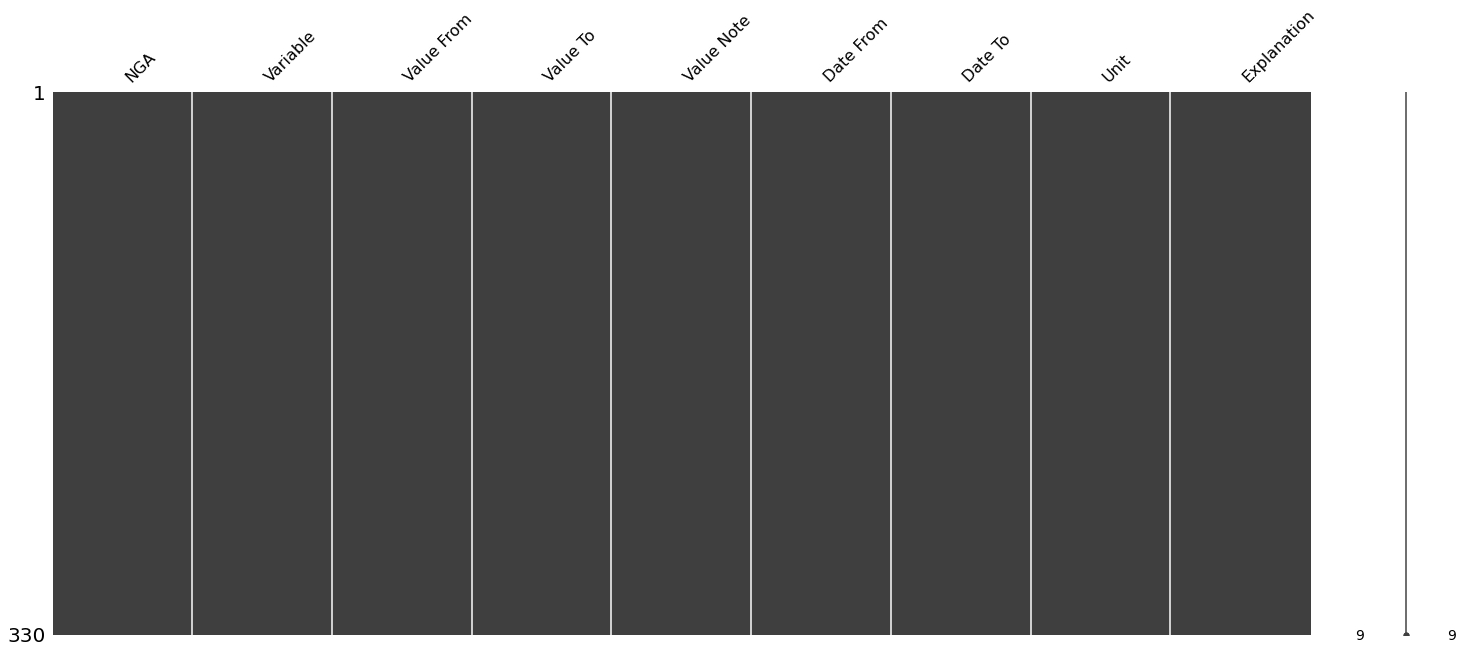

In [19]:
msno.matrix(df)

In [20]:
df.describe()

,Date From,Date To
count,330.000000,330.000000
mean,-1536.809091,1059.727273
std,2867.255946,1447.224197
min,-10000.000000,-7000.000000
25%,-3000.000000,710.000000
50%,-800.000000,1810.000000
75%,930.000000,1914.250000
max,2000.000000,2001.000000


**Observation:** Since we know that the only numerical columns in the dataset are of 'Date From' and 'Date To', we observe that the dates are given in negative entities as well.


The distribution of dates indicated that NGAs began to be represented at varying starting times and tended to continue to be observed until about 2000s. Breaking this down by looking at the above conclusions, we can say that the dates range from around 10000 BC to 2001 CE.



Text(0.5, 1.0, 'Relation betwwen time and NGA')

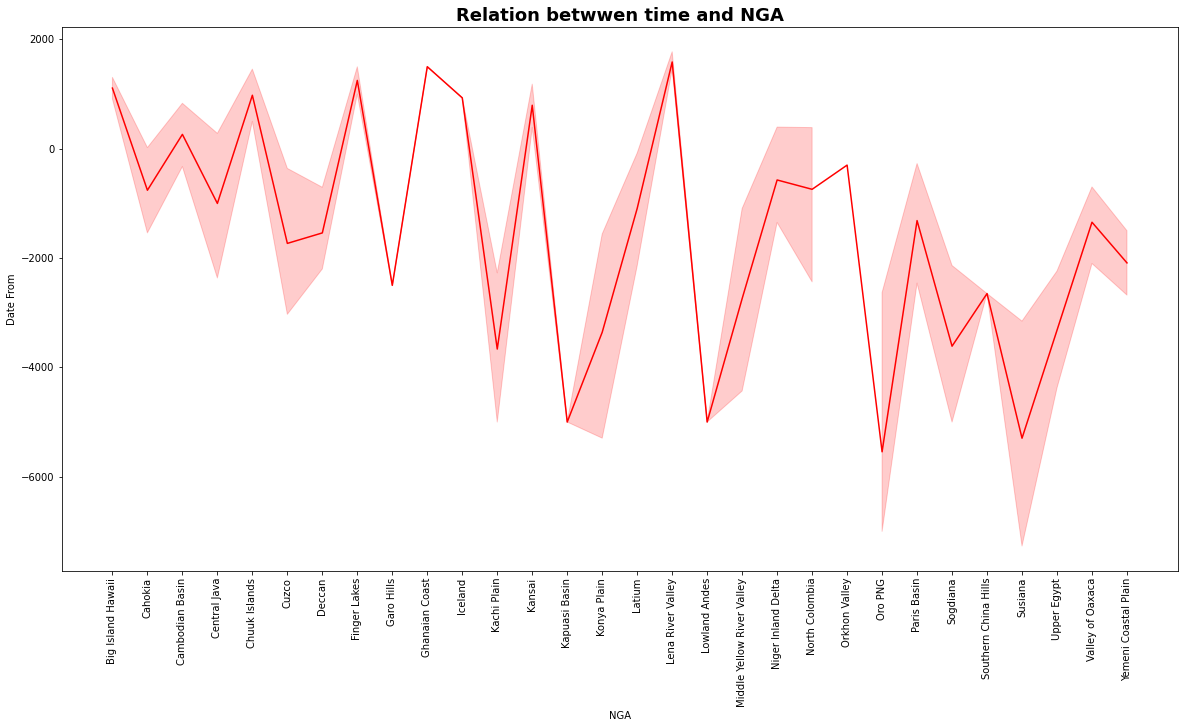

In [21]:
plt.figure(figsize=(20,10))
sns.lineplot(data=df, y="Date From",x='NGA', color='red')
plt.xticks(rotation=90)
plt.title('Relation betwwen time and NGA', fontsize=18, fontweight = "bold")

Text(0.5, 1.0, 'Counts of NGA')

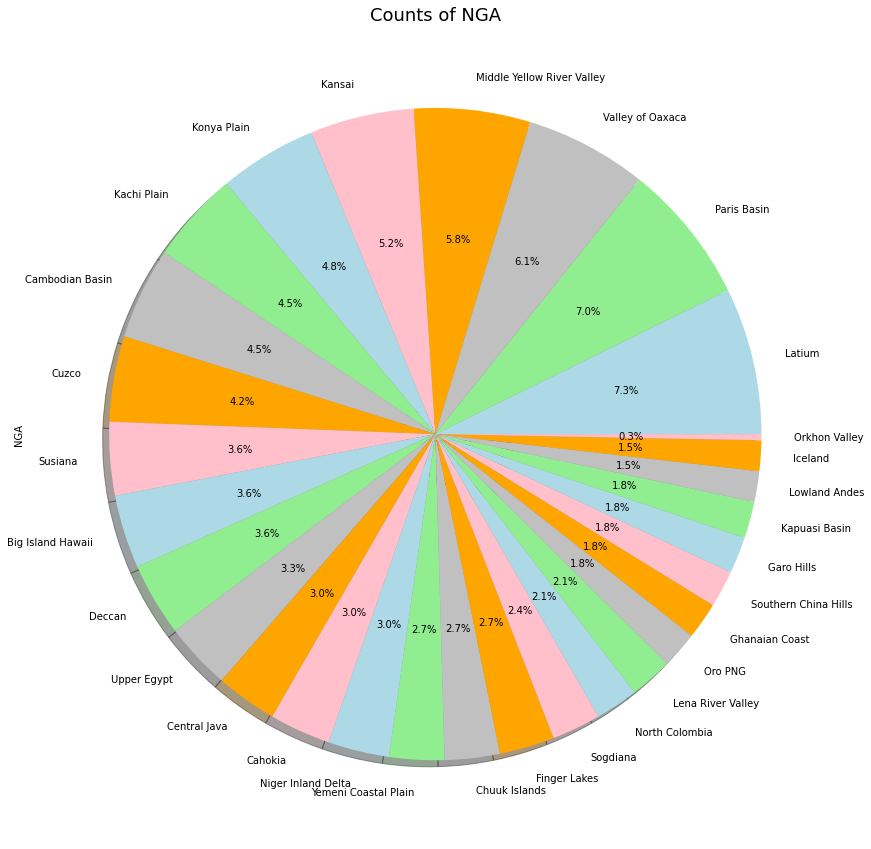

In [22]:
my_colors=['lightblue','lightgreen',
           'silver','orange','pink']
plt.figure(figsize=(15,15))
df.NGA.value_counts().plot.pie(autopct='%1.1f%%',shadow=True, colors = my_colors)
plt.title("Counts of NGA", fontsize=18)

In [23]:
df.NGA.nunique()

30

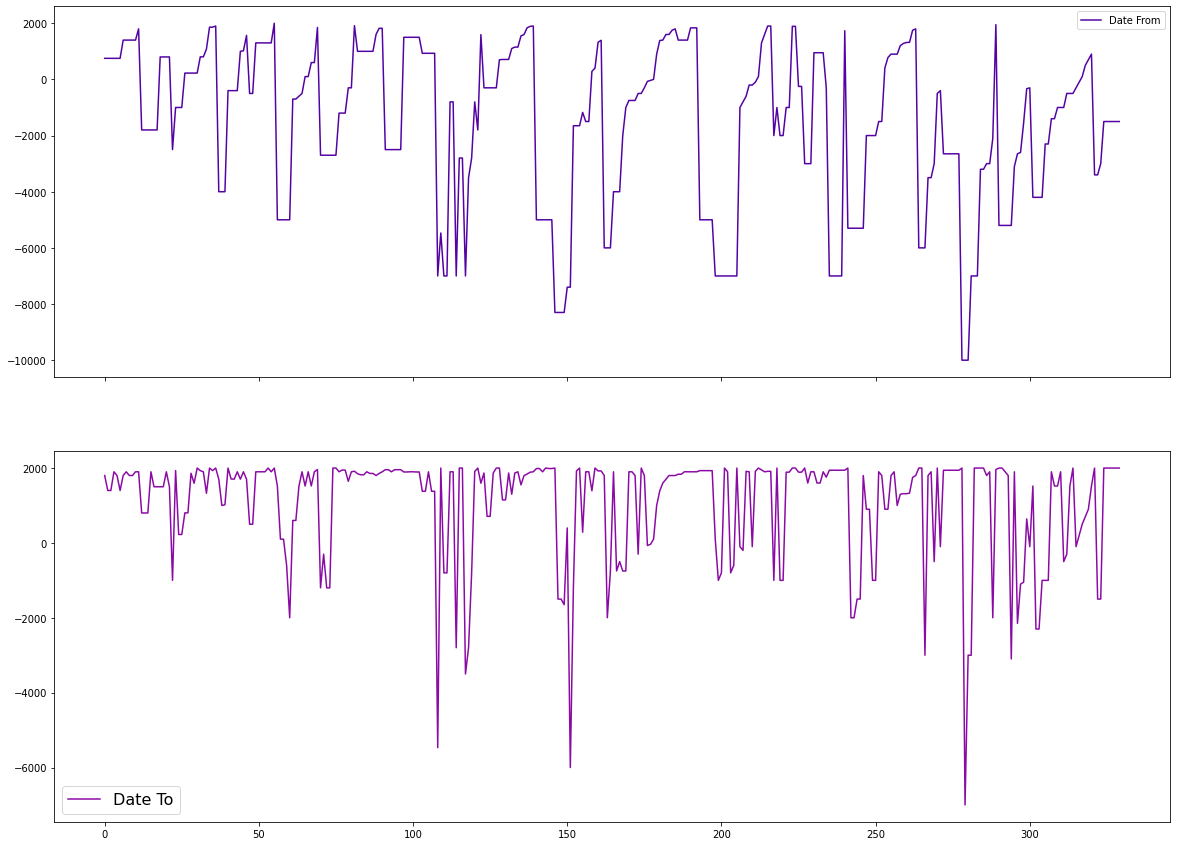

In [24]:
sns.set_palette("plasma")
df.plot(subplots=True, figsize=(20,15))
plt.legend(fontsize=16)
plt.show()

> We can see that the graphs show how the dates vary. This suggests that there were agricultural practices dated from as long as 10000 BC. Sounds fascinating, right?

<Figure size 2160x2160 with 0 Axes>

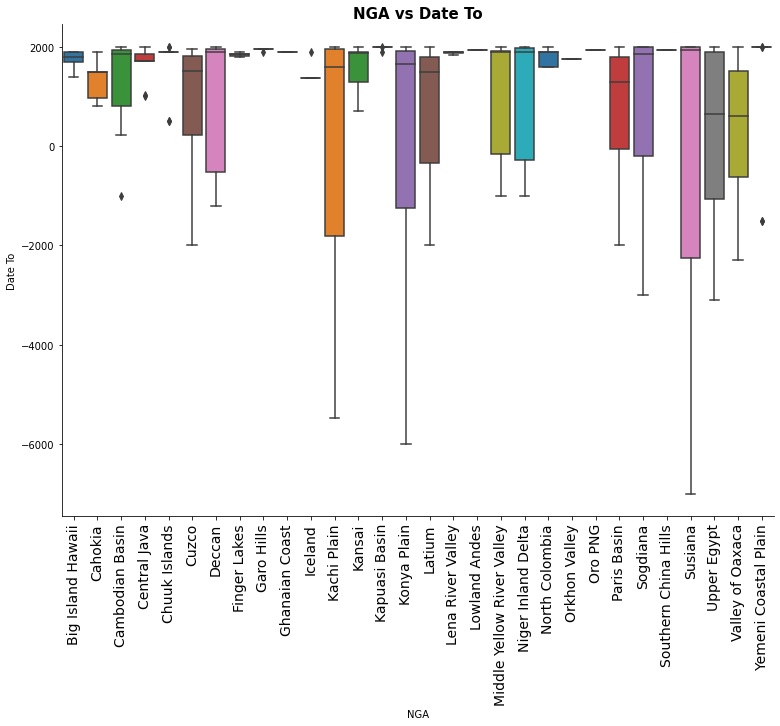

In [25]:
plt.figure(figsize=(30,30))
g = sns.catplot(x="NGA", y="Date To", kind="box",
            data=df.sort_values("NGA"), palette="tab10")
g.fig.set_figwidth(15)
g.fig.set_figheight(8)
plt.title('NGA vs Date To',fontsize=15, fontweight='bold')
plt.xticks(rotation=90, fontsize=14)
plt.show()

<Figure size 2160x2160 with 0 Axes>

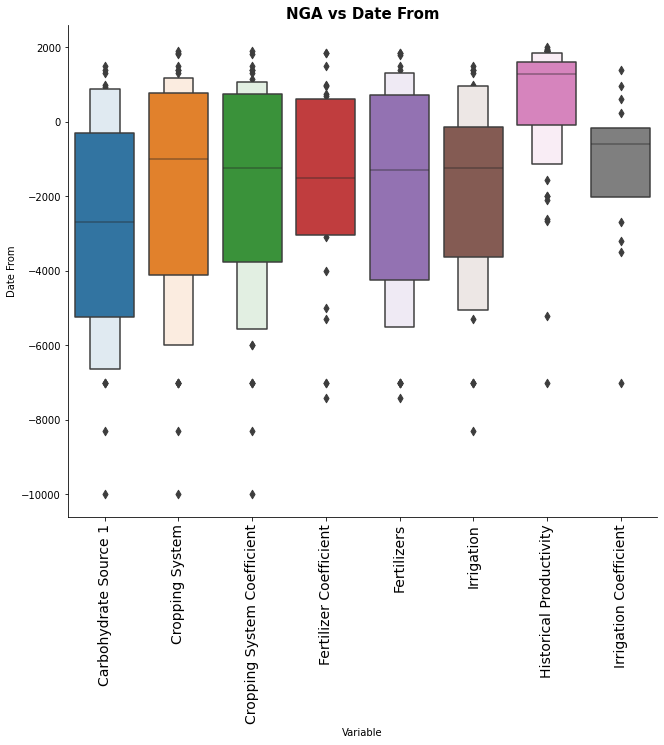

In [26]:
plt.figure(figsize=(30,30))
g = sns.catplot(x="Variable", y="Date From", kind="boxen",
            data=df.sort_values("NGA"), palette="tab10")
g.fig.set_figwidth(12)
g.fig.set_figheight(8)
plt.title('NGA vs Date From',fontsize=15, fontweight='bold')
plt.xticks(rotation=90, fontsize=14)
plt.show()

**Observations:** This is a beautiful plot which would help us draw several conclusions.  🌾🌽

We should keep this in mind that we haven't segregated the data on the basis of NGA in the above plot. Thus some farming practices may be adopted much later in certain regions than others.

* Carbohydrates were consumed from as long as 10000 BC.
* As humans started growing their own food, eventually they learned the concept of fertilizers. Fertilizers were adopted as a part of farming from around 7500 BC.
* Irrigation also started being used in agriculture from 8000 BC.
* Cropping Systems were also adopted around 10000 BC.

Seems like the homosapiens were much smarter than we thought them to be!



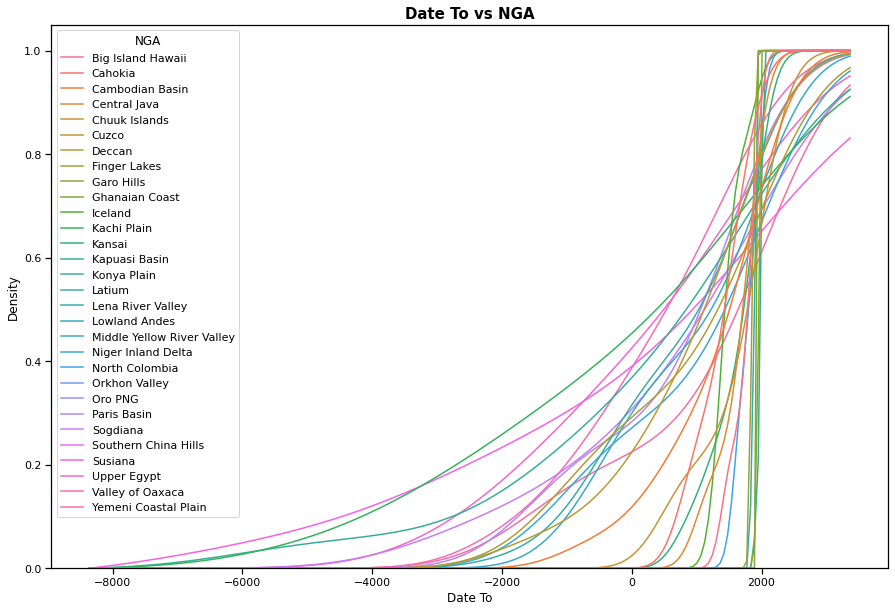

In [27]:
sns.set_palette("rainbow")
plt.figure(figsize=(15, 10))
sns.set_context("notebook",font_scale=1)
sns.kdeplot(data=df, x="Date To", hue="NGA",
    cumulative=True, common_norm=False, common_grid=True,
)
plt.title('Date To vs NGA',fontsize=15, fontweight='bold')

plt.show()

In [28]:
df_yield = df[(df.Unit == 't/ha')]

**Observation:** So basically what I've done here is segregated the columns which do not have the unit column as null (in other words have the unit as tonnes/hectare (t/ha)).

I am guessing that this has something to do with the yield of farming in different NGAs. 
Let's try to see 'Value From' and 'Value To' column. Do remember that earlier when we saw, both of these columns had object data types.

In [29]:
df_yield

,NGA,Variable,Value From,Value To,Value Note,Date From,Date To,Unit,Explanation
8,Big Island Hawaii,Historical Productivity,3.25,0,0,1400,1800,t/ha,This figure was derived from the mean yield fo...
21,Cahokia,Historical Productivity,0.672,1.681,0,800,1500,t/ha,"""Native maize yields were inherently low and u..."
33,Cambodian Basin,Historical Productivity,1.46,0,0,1080,1327,t/ha,"""Acker has given detailed consideration to the..."
36,Cambodian Basin,Historical Productivity,2.5,0,0,1900,2000,t/ha,An average household is composed of five to si...
46,Central Java,Historical Productivity,1.345,1.681,0,1568,1703,t/ha,"""Even under considerable variation in growing ..."
...,...,...,...,...,...,...,...,...,...
316,Valley of Oaxaca,Historical Productivity,0.7,1,0,-100,200,t/ha,Kowalewski 1980 (see above)
317,Valley of Oaxaca,Historical Productivity,0.8,1.1,0,100,500,t/ha,Kowalewski 1980 (see above)
318,Valley of Oaxaca,Historical Productivity,1,1.4,0,500,700,t/ha,The estimates for the highest quality land (Cl...
319,Valley of Oaxaca,Historical Productivity,1.1,1.5,0,700,900,t/ha,Kowalewski 1980 (see above)


In [30]:
df_yield['NGA'].value_counts()

Latium                        11
Paris Basin                   11
Valley of Oaxaca               7
Upper Egypt                    6
Middle Yellow River Valley     6
Kansai                         6
Chuuk Islands                  2
Cambodian Basin                2
Deccan                         1
Finger Lakes                   1
Kachi Plain                    1
Cahokia                        1
Konya Plain                    1
Cuzco                          1
Oro PNG                        1
Central Java                   1
Sogdiana                       1
Big Island Hawaii              1
Name: NGA, dtype: int64

**Observations:** The column variable ofdf_yield suggests that this dataframe tells us about the historical productivity of various NGAs, however, upon a closer look we see that several NGAs are counted more than once. 

This is because their yield or productivity is given to us during different priods. However, there is another major issue. These length of the time periods is not contant for differnt NGAs and even for the same one's and might also collide. In other words, for eg. in case of Valley of Oaxaca, a time period can be from 100 BC to 200 CE and also from 100 CE to 500 CE. 

In [31]:
df_yield['Variable'].unique()

array(['Historical Productivity'], dtype=object)

**Observation:** So the Variable column has only one value which is Historical Productivity. Interesting!

In [32]:
df_yield['Value From'].unique()

array(['3.25', '0.672', '1.46', '2.5', '1.345', '16', '10', '1.2',
       '1.371', '0.5', '1.096', '1.3', '1.55', '1.5', '1.9', '2.1', '2.2',
       '1', '0.376', '1.296', '1.35', '0.54', '0.23', '0.675', '0.878',
       '0.405', '0.258', '1.05', '0.75', '0.8', '0.25', '6.5', '0.65',
       '0.308', '0.773', '1.624', '1.16', '1.933', '2.22', '0.62', '1.07',
       '1.71', '1.425', '1.665', '1.075', '0.6', '0.7', '1.1', '1.4'],
      dtype=object)

> It is quite interesting to note that although the "Value From" column is still of object data type (because it's source i.e df was of object datatype), there are only numerical entries in this column.

> Further reading about this, helped me conlclude that the "Value From" and "Value To" column aims at telling the Yield or Productivity of an NGA during a particular period of time!

In [33]:
df_yield[['Value From', 'Value To']] = df_yield[['Value From', 'Value To']].apply(pd.to_numeric)
df_yield.dtypes

NGA             object
Variable        object
Value From     float64
Value To       float64
Value Note      object
Date From        int64
Date To          int64
Unit            object
Explanation     object
dtype: object

Text(0.5, 1.0, 'Relation betwwen Productivity and NGA across Time')

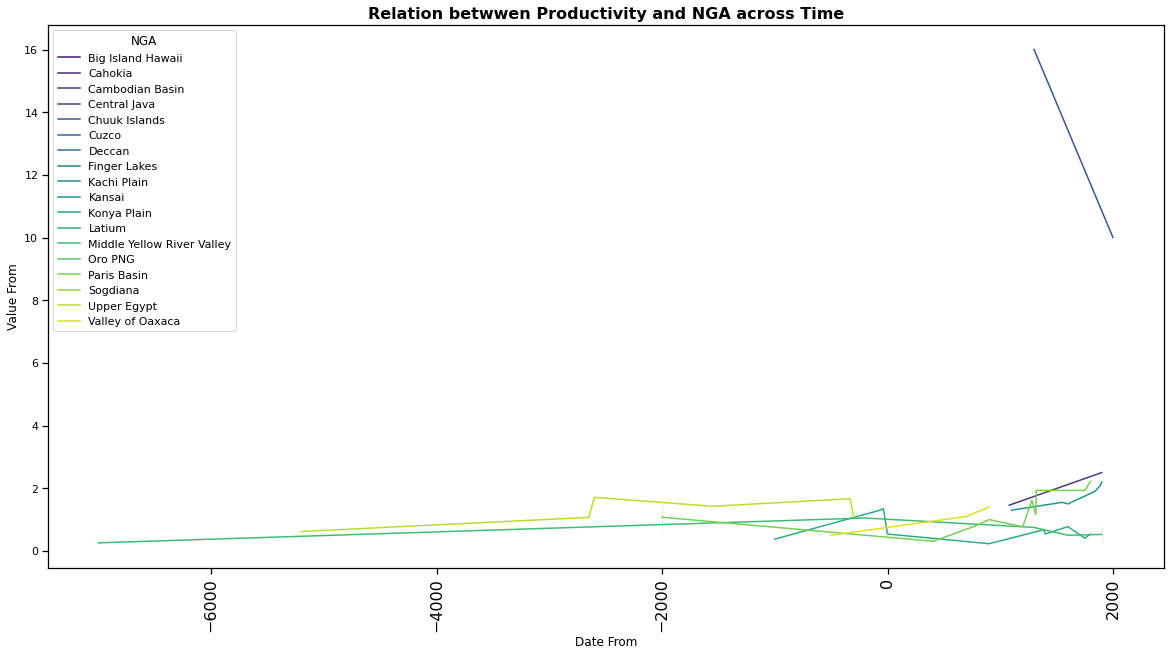

In [34]:
plt.figure(figsize=(20,10))
sns.lineplot(data=df_yield, y="Value From",x='Date From', palette='viridis', hue = 'NGA')
plt.xticks(rotation=90, fontsize=16)
plt.title('Relation betwwen Productivity and NGA across Time', fontsize=16, fontweight='bold')

**Observations:** This plot briefly helps us in understanding the agricultural productivity across various NGAs. 

* We see that while the 'Chuuk Islands' had the highest agricultural productivity, 'Middle Yellow River Valley' had the least. 
* However, we can see that most of the NGAs had their productivity around 1-4 t/ha.

Text(0.5, 1.0, 'Relation betwwen Productivity and NGA - (Value To)')

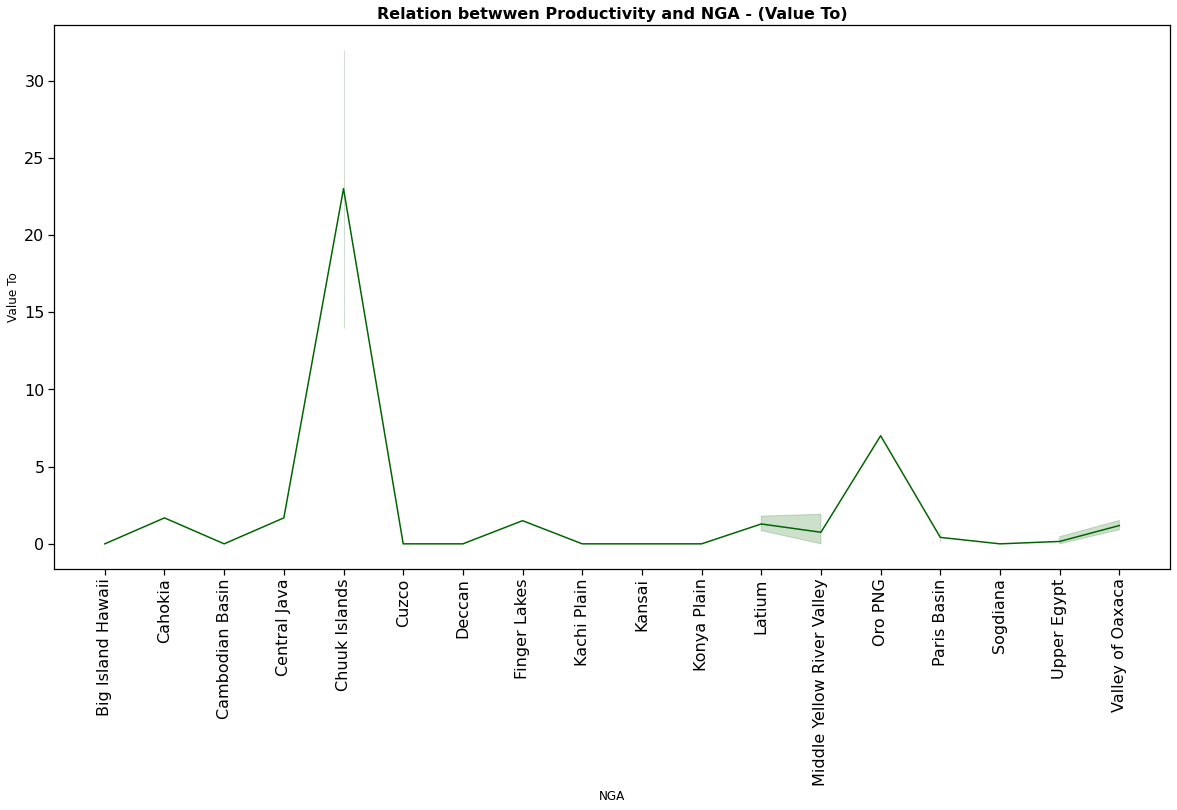

In [35]:
plt.figure(figsize=(20,10))
sns.lineplot(data=df_yield, y="Value To",x='NGA', color='darkgreen')
plt.xticks(rotation=90, fontsize=16)
plt.yticks(fontsize=16)
plt.title('Relation betwwen Productivity and NGA - (Value To)', fontsize=16, fontweight='bold')

**Observation:**  🌾🌽
* We can see that the graph does not show significant difference that the earlier graph.
* We can still see that the Chuuk Islands have highest productivity of 25 t/ha whereas it is minimum for Finger Lakes.

> We should keep in mind that since the 'Value To' column had around 84% null values and we decided to fill all the null values with '0', we are not considering the minimum as '0' (*in case of Big Island Hawaii, Cambodian Basin, Cuzco, Deccan, Kachi Plain, Kansai, Konya Plain and Sogdiana.*)

In [36]:
df_carb_source = df[(df.Variable == 'Carbohydrate Source 1')]

In [37]:
df_carb_source.head(10)

,NGA,Variable,Value From,Value To,Value Note,Date From,Date To,Unit,Explanation
0,Big Island Hawaii,Carbohydrate Source 1,sweet potato,0,0,750,1800,0,Sweet potato was the the dominant crop in the ...
12,Cahokia,Carbohydrate Source 1,chenopod,0,0,-1800,800,0,Smith and Yarnell 2009
18,Cahokia,Carbohydrate Source 1,maize,0,0,800,1500,0,Need reference
22,Cambodian Basin,Carbohydrate Source 1,rice,0,0,-2500,-1000,0,Bellwood (2005) dates the beginning of the Neo...
23,Cambodian Basin,Carbohydrate Source 1,rice,0,0,-1000,1932,0,"""The staples of their diet were rice and fish,..."
37,Central Java,Carbohydrate Source 1,rice,0,0,-4000,1703,0,"""Recent genetic work tells us that rice, Oryza..."
49,Chuuk Islands,Carbohydrate Source 1,breadfruit,0,0,1300,1900,0,"""In Chuuk the subsistence base of the earliest..."
56,Cuzco,Carbohydrate Source 1,maize,0,inferred,-5000,1520,0,While the Lake Marcacohca pollen cores can ind...
70,Deccan,Carbohydrate Source 1,millet,0,0,-2700,-1200,0,"2700-1200 BCE: ""Cattle and caprine pastoralism..."
76,Deccan,Carbohydrate Source 1,rice,0,0,-1200,1900,0,"""With the expansion in irrigation, rice cultiv..."


Text(0.5, 1.0, 'Relation between Date From and NGA')

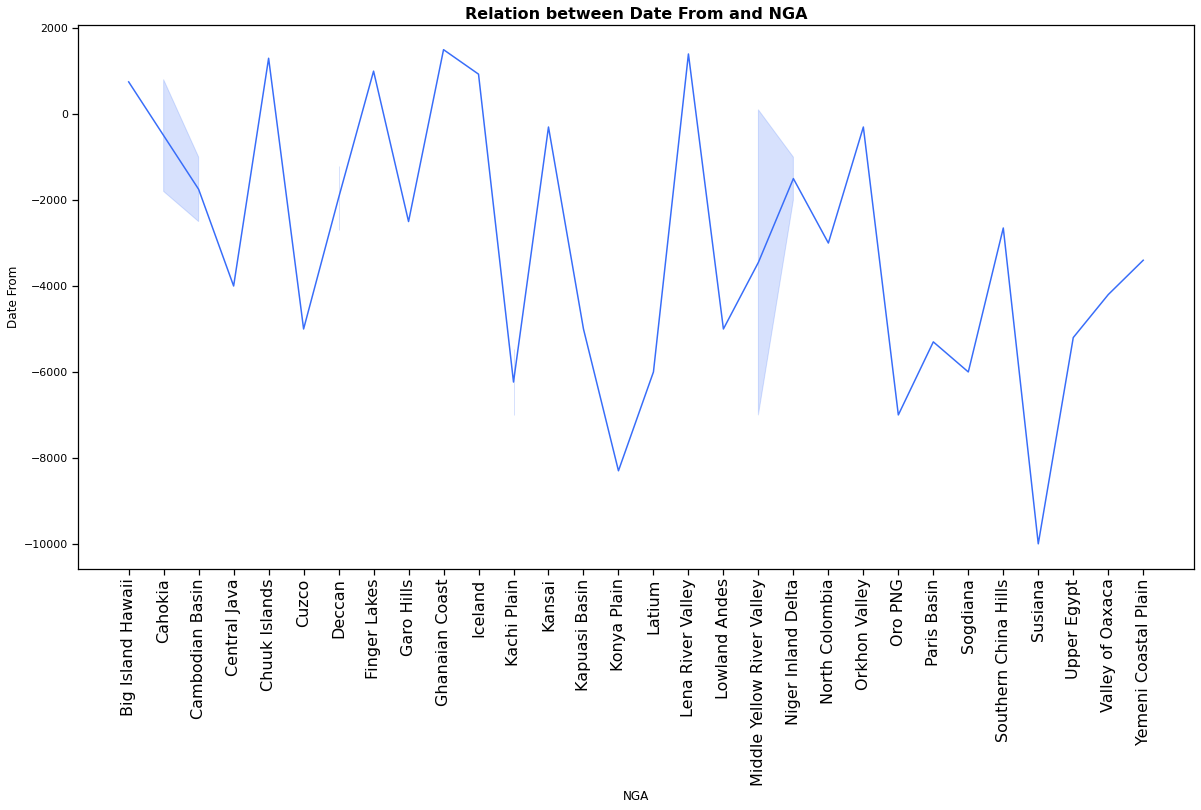

In [38]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90, fontsize=16)
sns.lineplot(x='NGA', y='Date From', data=df_carb_source)
plt.title('Relation between Date From and NGA', fontsize=16, fontweight='bold')

**Observation:**

* This graph tells us that Lena River Valley is fairly the youngest NGA or that data is not available for it before 1835 CE.
* Susiana is the only NGA which has data for 10000 BC available.
* All the other NGAs started between the time periods of 10000 BC to 1835 CE.

Text(0.5, 1.0, 'Relation between Type of Carbohydrate and NGA')

<Figure size 1440x1440 with 0 Axes>

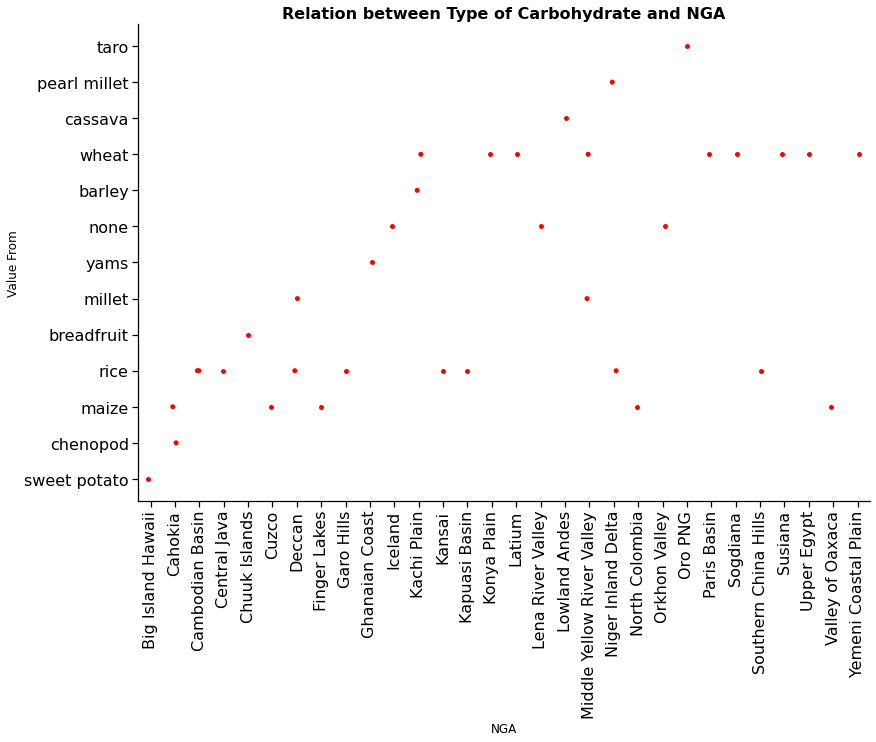

In [39]:
plt.figure(figsize=(20,20))
g = sns.catplot(data=df_carb_source, y="Value From",x='NGA', color='red')
plt.xticks(rotation=90, fontsize=16)
g.fig.set_figwidth(20)
g.fig.set_figheight(8)
plt.yticks(fontsize=16)
plt.title('Relation between Type of Carbohydrate and NGA', fontsize=16, fontweight='bold')

**Observations:**

* Sweet Potato was used as a source of carbohydrate in Big Island Hawaii.
* Chenopod were produced in Cahokia as a source of carbohydrate.
* Maize was a source of carbohydrate in Cahokia, Cuzco, Finger Lakes, North Colombia and Valley of Oaxaca.
* Rice was produced in Cambodian Basin, Central Java, Deccan, Ghanian Coast, Kansai, Kapuasi Basin, Niger Inland Delta and Southern China Hills.
* Chuuk Islands were the only NGA to produce Breadfruit as a source of carbohydrate.
* Millets were produced in Deccan and Middle Yellow River Valley.
* Ghanian Coast used Yams as a carbohydrate source.
* Wheat was used as a source of carbohydrate in the most number of regions including Kachi plain, Konya plain, Latium, Middle Yellow River Valley, Paris Basin, Sogdiana, Susiana, Upper Egypt and Yemeni Coastal Plain.


Text(0.5, 1.0, 'Count of Different Carbohydrate Sources across NGAs')

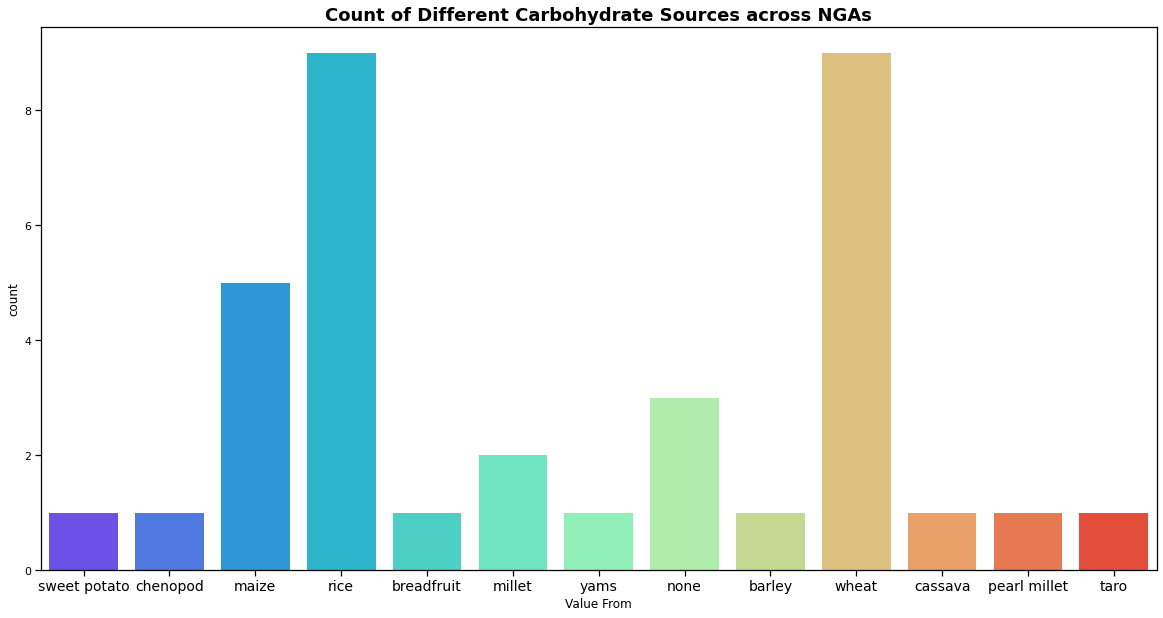

In [40]:
plt.figure(figsize=(20,10))
sns.countplot(data=df_carb_source, x="Value From", palette='rainbow')
plt.xticks(fontsize=14)
plt.title('Count of Different Carbohydrate Sources across NGAs', fontsize=18, fontweight='bold')

**Observations:** Rice and wheat, followed by maize, and millet were the most popular sources of carbohydrates across various NGAs

In [41]:
df_irrigation = df[(df.Variable == 'Irrigation Coefficient')]
df_irrigation.head(5)
df_irrigation[['Value From', 'Value To']] = df_irrigation[['Value From', 'Value To']].apply(pd.to_numeric)


**Observation:** Out of the variable column, when we select the Irrigation Coefficient, what actually happens is that only those NGAs which used irrigation in a specific time period are selected.

> Now what actually is irrigation coefficient? 🧼🚿

It is a parameter which tells us about how irrigation affected affected the crop yield. An irrigation coefficient of 1 tells us that irrigation had no effect on the productivity whereas a coefficient greater than 1 tells how much yield increased with the irrigation!

Text(0.5, 1.0, 'Coefficient of Irrigation across NGAs')

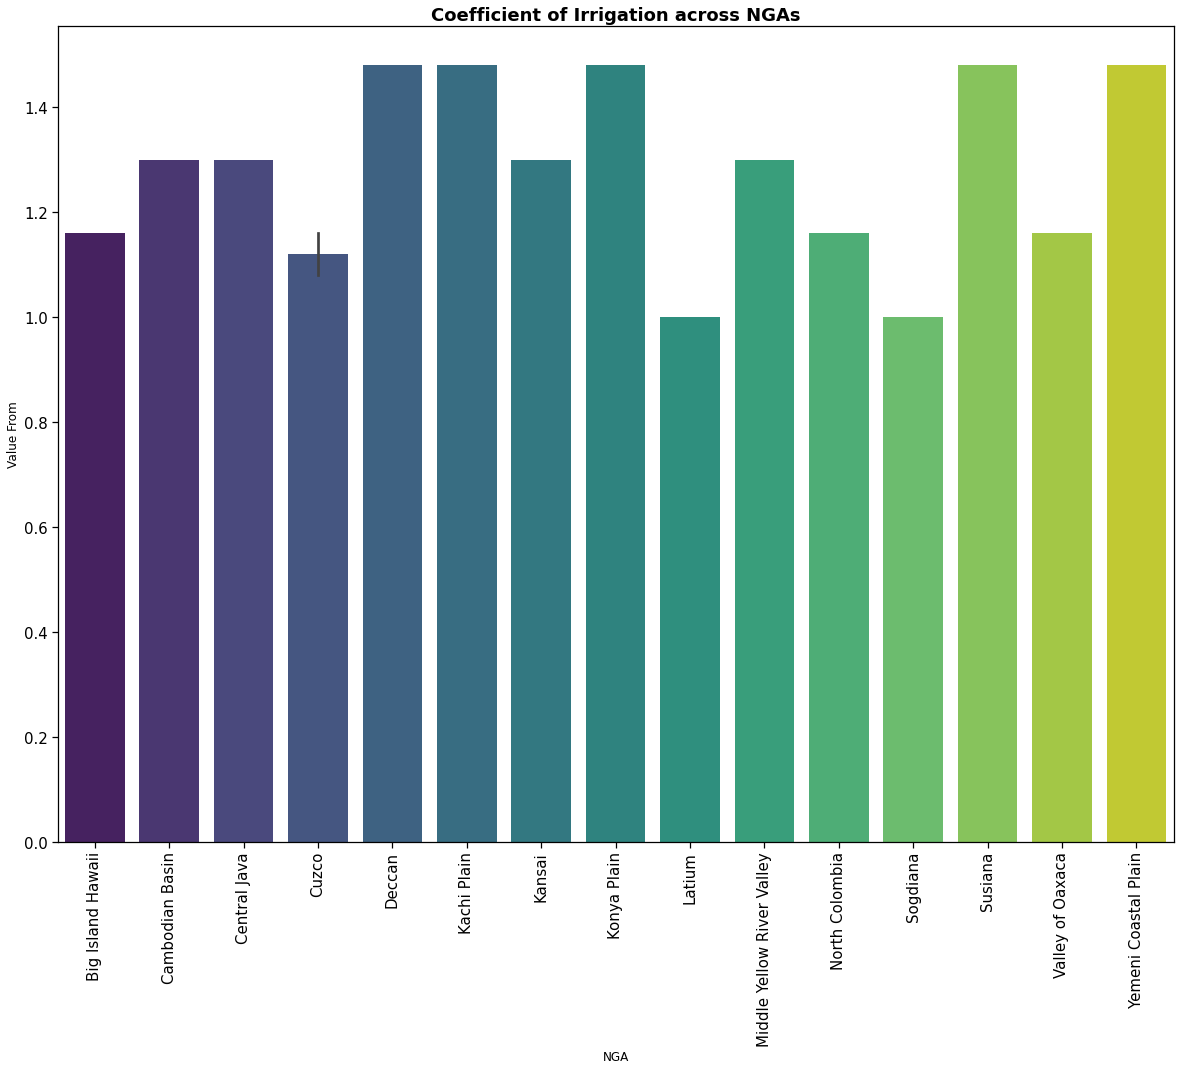

In [42]:
plt.figure(figsize=(20,15))
sns.barplot(data=df_irrigation, x="NGA", y="Value From", palette="viridis")
plt.xticks(fontsize=15, rotation = 90)
plt.yticks(fontsize=15)
plt.title('Coefficient of Irrigation across NGAs', fontsize=18, fontweight='bold')

**Observations:** 🧼🚿

* We see that Deccan, Kachi Plain, Kansai Plain, Susiana and Yemeni Coastal Plain had the highest irrigation coefficient.
* Latium and Sogdiana had an irrigation coefficient of 1, suggesting that  there was considerable rainfall in these regions and irrigation did not make much difference in the crop productivity.
* Out of the 30 unique NGAs available, there were only 15 of them which used irrigation at any given time. This might probably had to do with the weather conditions at different NGAs.

In [43]:
df_fertilizer = df[(df.Variable == 'Fertilizer Coefficient')]
df_fertilizer.head(5)
df_fertilizer[['Value From', 'Value To']] = df_fertilizer[['Value From', 'Value To']].apply(pd.to_numeric)

Text(0.5, 1.0, 'Coefficient of Fertilizer across NGAs')

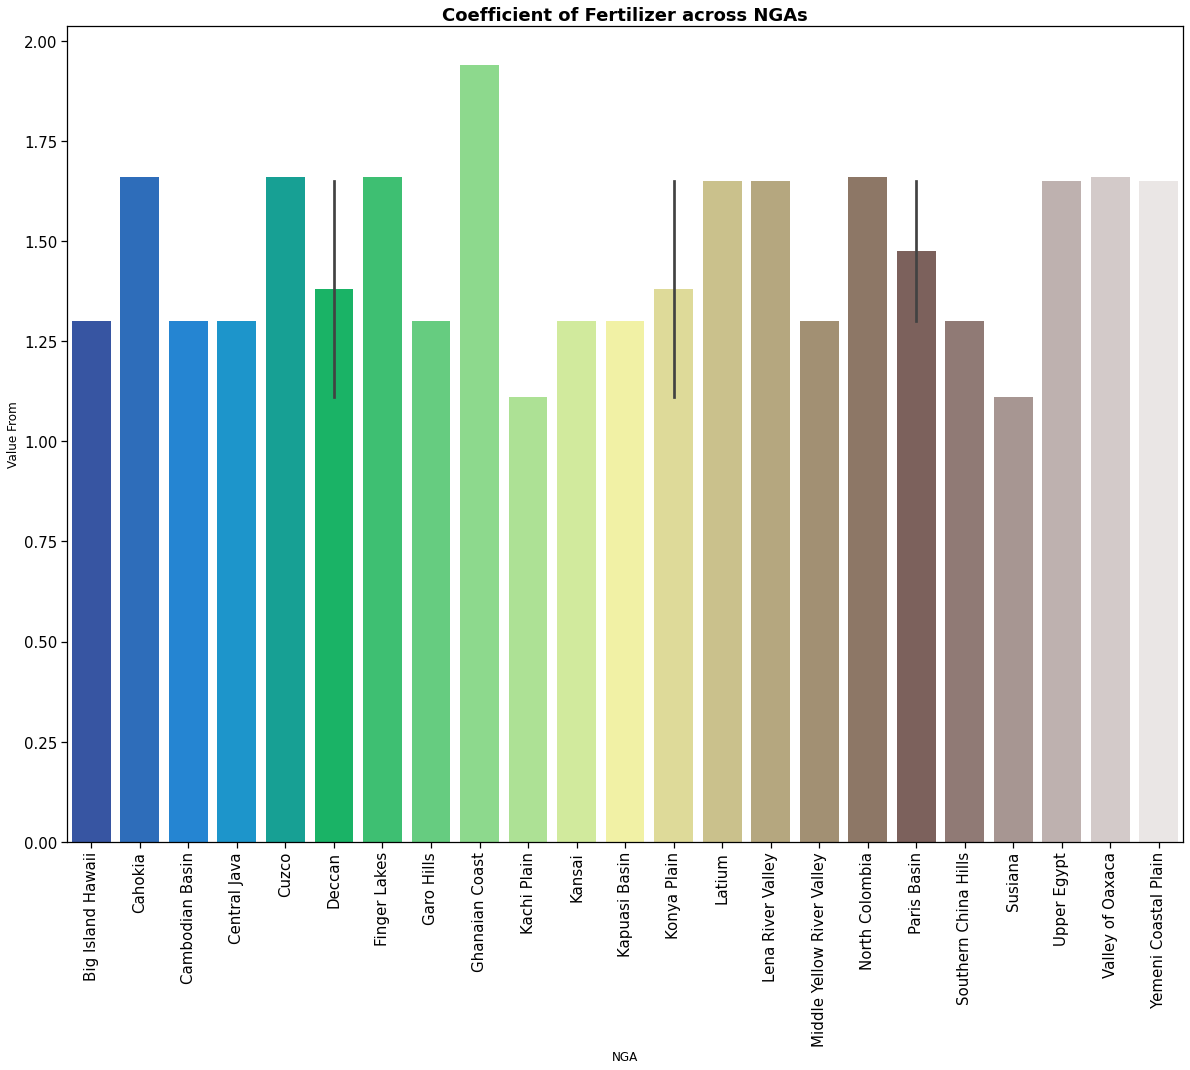

In [44]:
plt.figure(figsize=(20,15))
sns.barplot(data=df_fertilizer, x="NGA", y="Value From", palette="terrain")
plt.xticks(fontsize=15, rotation = 90)
plt.yticks(fontsize=15)
plt.title('Coefficient of Fertilizer across NGAs', fontsize=18, fontweight='bold')

**Observations:** 🌾⛏🌱
* Out of total 30 NGAs, 23 of them used fertilizers in their farming.
* The highest Fertilizer Coefficient is of around 1.90 is of Ghanian Coast.
* The coefficients of Deccan, Konya Plain and Paris Basin varies from time to time. This might be because of kind of ferilizer source used at different times.
* Almost all the fertilizer coefficients are greater than 1, suggesting that the use of fertilizers helped in improving the crop producivity.

<h1 style = "font-family: Comic Sans MS;background-color:#FFC305"> Conclusion : The Agriculture Project - Seshat </h1>

Estimating agricultural productivity on a global scale over long periods of time, going back all the way to the beginnings of agriculture, is not an easy task. Here we proposed and implemented a
procedure that systematically incorporates various factors that affect agricultural yields in different world regions and different time periods. Any such scheme must be based on an explicit
model, which means making simplifying assumptions. In particular, we assumed that we can use a single agricultural crop, a major carbohydrate source for populations inhabiting each NGA. 

Next, due to limitations of historical data on how various cultivation practices (fallowing, irrigation, and fertilization) affected yields in the past, it is difficult to draw much conclusions from the dataset. 🌾🌽

While using generic coefficients is a reasonable first step (and certainly better
than not taking these processes into account), what is needed next is an investigation that will allow us to tailor this approach to individual Seshat NGAs, with their different climates and physical environments. Yet another limitation of the present study regards the way in which climate effects are currently handled. A millennium-long time step is far too long for many of the questions that we want to ask about the evolution of complex societies and, particularly, for the periodic breakdowns that they go through. A time step of 1 century, or, better, of a decade, would be much more informative.

